In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [2]:
# df = pd.read_csv('events.csv')
df1=pd.read_csv('event_ann.csv')
df2=pd.read_csv('eventsummary.csv')
df3=pd.read_csv('labels.csv')
df2=df2[0:1000]
df1=df1.reset_index()

In [3]:
df2

,event_id,event_summary
0,0,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...
995,995,Passengers are evacuated from south domestic terminal at Hartsfield Jackson Atlanta International Airport in US state of Georgia after a suspicious package is found. The package is declared safe by a bomb squad
996,996,Nigerien President Mahamadou Issoufou wins reelection in a second round of voting receiving 92 percent of vote in an election that was boycotted by opposition
997,997,Voters in Senegal approve a series of constitutional reforms which include a reduction of presidential terms from seven to five years with 63 percent of vote
998,998,Front runners Hillary Clinton and Donald Trump won Democratic and Republican primary in Arizona. Bernie Sanders and Ted Cruz each won their partys votes in Idaho and Utah. The early results for Tuesdays GOP caucus in American Samoa nine uncommitted


In [4]:
rel_df=df1[['event_id','Final_Goal_Test','argtext']]

In [6]:

rel_df= rel_df.dropna(subset=['Final_Goal_Test'])
rel_df=rel_df.reset_index()
rel_df=rel_df[['event_id','Final_Goal_Test','argtext']]
df2.loc[:,'anno_event_summary']=df2.loc[:,'event_summary']

In [108]:
# n=1
for j in range(0,1000):
    n=1
#     print(j)
    text1=df2.loc[j,'event_summary']
    eid=df2.loc[j,'event_id']
    
    
    for i in range(0,2030):
        text2=str(df1.loc[i,'argtext'])
        eidd=df1.loc[i,'event_id']
        if text2 in text1 and eidd==eid:
            text1=text1.replace(text2,"<e"+str(n)+">"+text2+"<\e"+str(n)+">")
            n=n+1
#             print(text1)
            df2.loc[j,'event_summary']=text1
        

In [109]:
df2=df2[0:999]

In [110]:
# merged_df = join(df2, rel_df, on = [[:event_id]], kind = :outer)

In [111]:
# merged = df2.merge(rel_df, left_index=True, right_index=True, how='outer')
merged=pd.merge(df2, rel_df, on='event_id', how='inner')

In [112]:
merged = merged.rename(columns={'Final_Goal_Test': 'Relation'})

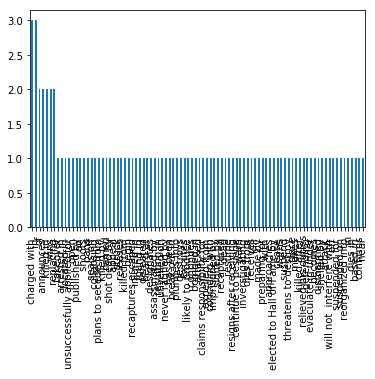

In [113]:
merged['Relation'][1:100].value_counts().plot(kind="bar")

In [114]:
# merged

In [115]:
# df5=merged['Relation'].value_counts()
# df5[df5==2]

In [116]:
from nltk.corpus import wordnet as wn
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.preprocessing import LabelEncoder
import numpy as np

## 1. Encoding using sequences

In [117]:
n_most_common_words = 20000 # vocabulary size 20000
max_len = 100
tokenizer = Tokenizer(num_words=n_most_common_words, lower=True)
print(tokenizer.fit_on_texts(merged['event_summary'].values))
sequences = tokenizer.texts_to_sequences(merged['event_summary'].values)
word_index = tokenizer.word_index
# print(word_index)
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len)

None
Found 6490 unique tokens.


In [118]:
print(merged['event_summary'][1])
print(sequences[1])

A new 28foot tall statue of Jesus dubbed <e1>Jesus de Greatest<\e1> is unveiled on <e2>New Years<\e2> Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
[5, 43, 2983, 2984, 1837, 3, 1038, 1838, 1, 1038, 580, 1839, 1, 11, 2985, 12, 2, 43, 74, 2, 227, 228, 844, 2986, 1039, 845, 4, 2987, 365, 2988, 2989, 27, 54, 11, 1840, 25, 2990, 1038, 1837, 4, 846]


In [119]:
# tokenizer = Tokenizer(num_words=n_most_common_words, lower=False)
# print(tokenizer.fit_on_texts(df3['Labels'].values))
# sequences1 = tokenizer.texts_to_sequences(df3['Labels'].values)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))
# labels = pad_sequences(sequences1, maxlen=max_len)

In [120]:
# tokenizer = Tokenizer(num_words=n_most_common_words, lower=True)
# print(tokenizer.fit_on_texts(merged['Relation'].values))
# sequences2 = tokenizer.texts_to_sequences(merged['Relation'].values)
# word_index2 = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index2))
# labels1 = pad_sequences(sequences2, maxlen=max_len)

In [121]:
code = np.array(df3['Labels'])
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)
labels = to_categorical(vec) # from keras.utils.np_utils

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.20, random_state=2)


ValueError: Found input variables with inconsistent numbers of samples: [1037, 4882]

In [123]:
labels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [53]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [54]:
embedding_size = 300
model = Sequential()
model.add(Embedding(n_most_common_words, embedding_size, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
# model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
# model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.compile(
#   optimizer='sgd',
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 6,340,900
Trainable params: 6,340,900
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
len(X_train)

829

In [56]:
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.1)
# model.fit(X_train, y_train, epochs=3, validation_data(X_test,y_test))



Train on 746 samples, validate on 83 samples
Epoch 1/3
746/746 [==============================] - 15s 20ms/step - loss: 10.8848 - acc: 0.9835 - val_loss: 9.9295 - val_acc: 0.9833
Epoch 2/3
746/746 [==============================] - 6s 8ms/step - loss: 7.9573 - acc: 0.9835 - val_loss: 4.4604 - val_acc: 0.9861
Epoch 3/3
746/746 [==============================] - 8s 10ms/step - loss: 2.6033 - acc: 0.9855 - val_loss: 3.1611 - val_acc: 0.9861


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

99

In [59]:
rounded_predictions = model.predict_classes(X_test, batch_size=128)
rounded_predictions[1]

99

In [60]:
cm = confusion_matrix(rounded_labels, rounded_predictions)

In [61]:
cm[2]

array([  0,   0, 147], dtype=int64)

In [62]:
# prediction_probas = model.predict(X_test) 
# predictions = [np.argmax(pred) for pred in prediction_probas]

# print(confusion_matrix(y_test, predictions)) #from sklearn.metrics
print(classification_report(rounded_labels, rounded_predictions, digits=3))

              precision    recall  f1-score   support

          97      0.000     0.000     0.000         4
          98      0.000     0.000     0.000        57
          99      0.707     1.000     0.828       147

   micro avg      0.707     0.707     0.707       208
   macro avg      0.236     0.333     0.276       208
weighted avg      0.499     0.707     0.585       208



c:\users\gulja\python 3.7.3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
